In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
# read file 
df = pd.read_csv("test2.csv")

In [3]:
# check head
df.head()

,Date,Time,Temperature,Humidity,Luminosity
0,2021-11-4,18:00:00,21.5,34.1,very bright
1,2021-11-4,18:00:00,21.5,17.5,very bright
2,2021-11-4,18:00:00,21.5,35.6,very bright
3,2021-11-4,18:00:00,21.6,35.2,very bright
4,2021-11-4,18:00:00,21.6,34.6,very bright


In [72]:
'''
#Rename first column
df = df.rename(columns={'2021-10-4': 'Date', '18:00:00': 'Time', '21.50': 'Temperature', '33.00' : 'Humidity', 'bright' : 'Luminosity'})
'''

In [87]:
# check head
df.head()

,Date,Time,Temperature,Humidity,Luminosity
0,2021-11-4,18:00:00,21.5,34.1,very bright
1,2021-11-4,18:00:00,21.5,17.5,very bright
2,2021-11-4,18:00:00,21.5,35.6,very bright
3,2021-11-4,18:00:00,21.6,35.2,very bright
4,2021-11-4,18:00:00,21.6,34.6,very bright


In [74]:
'''
#Correcting wrong date
for i in range(len(df['Date'])):
    df['Date'][i] = df['Date'][i].replace('-10-', '-11-')
'''

<ipython-input-74-4e3fd73920d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'][i] = df['Date'][i].replace('-10-', '-11-')


In [105]:
df.head()

,Date,Time,Temperature,Humidity,Luminosity
0,2021-11-4,18:00:00,21.5,34.1,very bright
1,2021-11-4,18:00:00,21.5,17.5,very bright
2,2021-11-4,18:00:00,21.5,35.6,very bright
3,2021-11-4,18:00:00,21.6,35.2,very bright
4,2021-11-4,18:00:00,21.6,34.6,very bright


In [76]:
#export to csv
#df.to_csv('test2.csv', index=False)

In [4]:
#Add date string and time string togheter
df['Date'] + ' ' + df['Time']

0        2021-11-4 18:00:00
1        2021-11-4 18:00:00
2        2021-11-4 18:00:00
3        2021-11-4 18:00:00
4        2021-11-4 18:00:00
               ...         
4244    2021-11-10 14:00:00
4245    2021-11-10 14:00:00
4246    2021-11-10 14:00:00
4247    2021-11-10 14:00:00
4248    2021-11-10 14:00:00
Length: 4249, dtype: object

In [5]:
#Make date and time into one column with datetime as dtype
DateTime = pd.to_datetime(df['Date'] + ' ' + df['Time'])
DateTime

0      2021-11-04 18:00:00
1      2021-11-04 18:00:00
2      2021-11-04 18:00:00
3      2021-11-04 18:00:00
4      2021-11-04 18:00:00
               ...        
4244   2021-11-10 14:00:00
4245   2021-11-10 14:00:00
4246   2021-11-10 14:00:00
4247   2021-11-10 14:00:00
4248   2021-11-10 14:00:00
Length: 4249, dtype: datetime64[ns]

In [6]:
df.dtypes

Date            object
Time            object
Temperature    float64
Humidity       float64
Luminosity      object
dtype: object

In [7]:
#drop old coulumns
df = df.drop(['Date', 'Time'], axis=1)
df

,Temperature,Humidity,Luminosity
0,21.5,34.1,very bright
1,21.5,17.5,very bright
2,21.5,35.6,very bright
3,21.6,35.2,very bright
4,21.6,34.6,very bright
...,...,...,...
4244,20.8,34.4,very bright
4245,20.8,34.5,very bright
4246,20.8,34.5,very bright
4247,20.7,34.6,very bright


In [8]:
#Insert DateTime as new coulumn
df.insert(0, "DateTime", DateTime)

In [9]:
df.dtypes

DateTime       datetime64[ns]
Temperature           float64
Humidity              float64
Luminosity             object
dtype: object

In [152]:
df

,DateTime,Temperature,Humidity,Luminosity
0,2021-11-04 18:00:00,21.5,34.1,very bright
1,2021-11-04 18:00:00,21.5,17.5,very bright
2,2021-11-04 18:00:00,21.5,35.6,very bright
3,2021-11-04 18:00:00,21.6,35.2,very bright
4,2021-11-04 18:00:00,21.6,34.6,very bright
...,...,...,...,...
4244,2021-11-10 14:00:00,20.8,34.4,very bright
4245,2021-11-10 14:00:00,20.8,34.5,very bright
4246,2021-11-10 14:00:00,20.8,34.5,very bright
4247,2021-11-10 14:00:00,20.7,34.6,very bright


<AxesSubplot:xlabel='DateTime', ylabel='Temperature'>

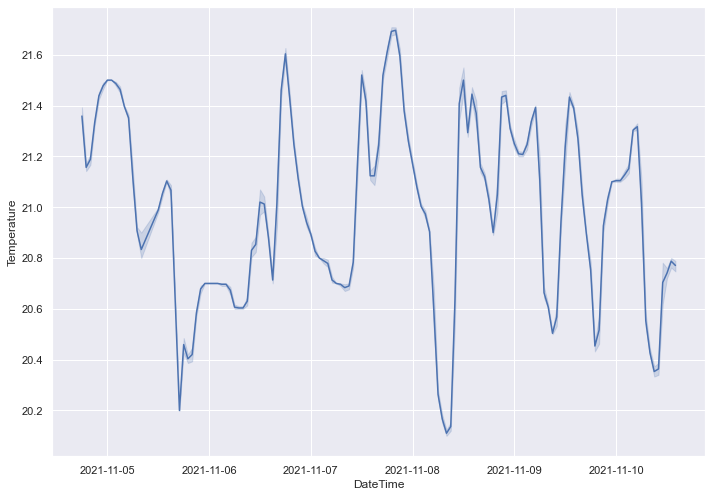

In [10]:
#plot temperature
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=df, x='DateTime', y="Temperature")

<AxesSubplot:xlabel='DateTime', ylabel='Humidity'>

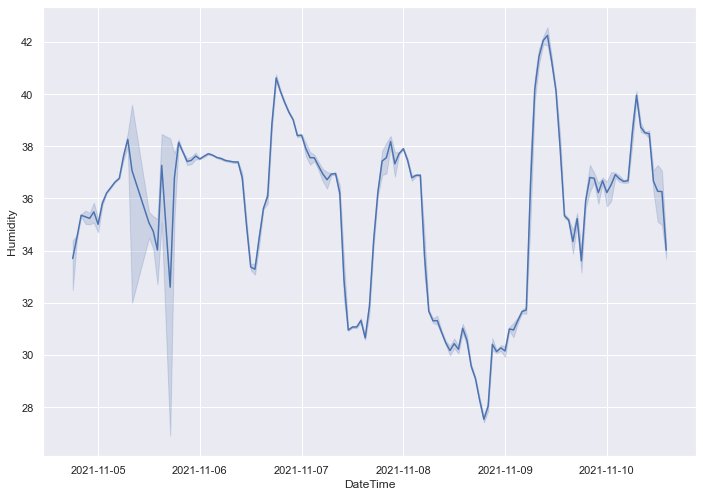

In [11]:
#plot humitity
sns.lineplot(data=df, x='DateTime', y="Humidity")

<AxesSubplot:xlabel='DateTime'>

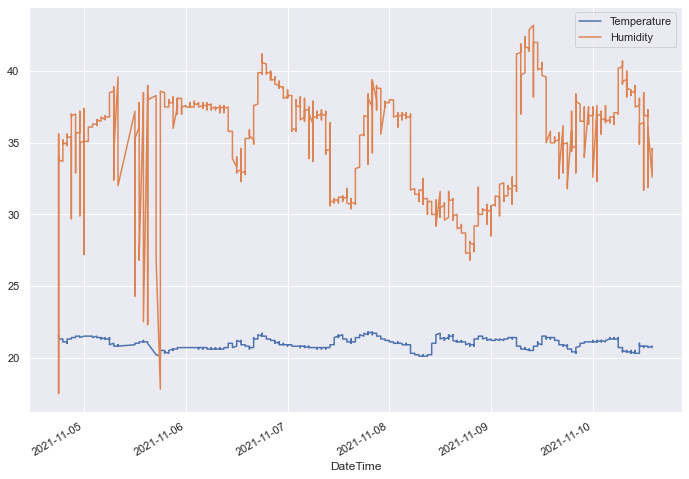

In [24]:
#df = df.melt('DateTime', var_name='cols', value_name='vals')
df.plot(x="DateTime", y=["Temperature", "Humidity"], kind="line")

In [16]:
#g = sns.lineplot(x="DateTime", y="vals", hue='cols', data=df)
#sns.kdeplot(df['Temperature'], ax =ax)
#sns.kdeplot(df['Humidity'], ax = ax)
#plt.show()